#  &bull;  Import Dependencies

In [55]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from PIL import Image

# &bull;  Load Dataset

In [2]:
x_train = np.loadtxt('Image Classification CNN Keras Dataset\input.csv', delimiter = ',')
y_train = np.loadtxt('Image Classification CNN Keras Dataset\labels.csv', delimiter = ',')

x_test = np.loadtxt('Image Classification CNN Keras Dataset\input_test.csv', delimiter = ',')
y_test = np.loadtxt('Image Classification CNN Keras Dataset\labels_test.csv', delimiter = ',')

# Values need to be between 0 and 1
# RGB values are by default 0 to 255 so we divide by 255 to get the decimal
x_train = x_train / 255.0
x_test = x_test / 255.0

In [3]:
# Reshape the data
# Need to reshape the date into 100x100px images with 3 rgb values each
# Also need to remove the empy value in the y_test / y_train values
x_train = x_train.reshape(len(x_train), 100, 100, 3)
y_train = y_train.reshape(len(y_train), 1)

x_test = x_test.reshape(len(x_test), 100, 100, 3)
y_test = y_test.reshape(len(y_test), 1)

# Output the new shapes of the data
print("Shape of x_train: ", x_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of x_train:  (2000, 100, 100, 3)
Shape of y_train:  (2000, 1)
Shape of x_test:  (400, 100, 100, 3)
Shape of y_test:  (400, 1)


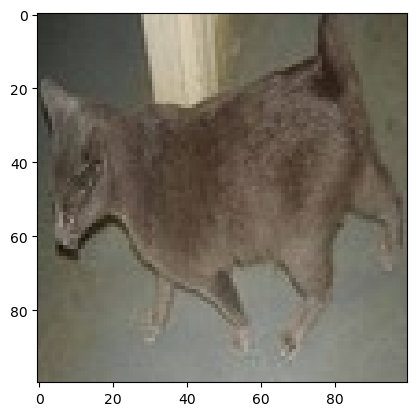

In [4]:
# Show random image to verify
idx = random.randint(0, len(x_train))
plt.imshow(x_train[idx, :])

# &bull; Create the model

In [73]:
# Add all layers (in a sequential model)
model = Sequential([
    
    # Layer 1
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)), # 32 filters of 3x3 size
    MaxPooling2D((2,2)), # Size of the filer. Can also mention the stride, but the default value is fine
    
    # Layer 2
    Conv2D(32, (3,3), activation = 'relu'), # We do not need to mention the input_shape as that is only for the first layer
    MaxPooling2D((2,2)), # Size of the filter
    
    # Layer 3 (Fully connected)
    Flatten(),
    Dense(64, activation = 'relu'),   # Number of neurons and acivation function
    Dense(1,  activation = 'sigmoid') # sigmoid as we are using binary classificaion
])


In [6]:
# Add Cost function and backpropagate

# opt = keras.optimizers.SGD(leaniing_rate=0.001)  # This is if we want to create our own optimizer

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy']) # This is the loss function


In [84]:
# Train the model
model.fit(x_train, y_train, epochs = 10, batch_size = 64)

ValueError: You must call `compile()` before using the model.

In [8]:
# Test the model
model.evaluate(x_test, y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6671 - loss: 0.6839


[0.632270097732544, 0.699999988079071]

# &bull; Predict Random Image

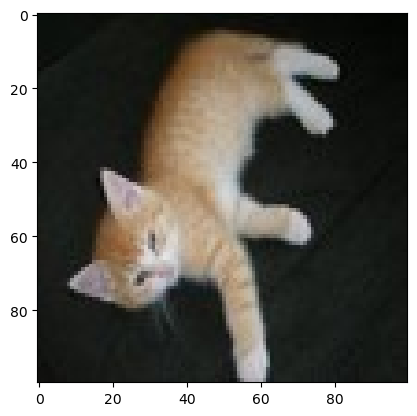

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Prediciton: This is a cat


In [100]:
idx2 = random.randint(0, len(y_test))#
plt.imshow(x_test[idx2,:])
plt.show()

y_pred = model.predict(x_test[idx2, :].reshape(1, 100, 100, 3))

if(y_pred > 0.5):
    pred = 'cat'
else:
    pred = 'dog'

print("Prediciton: This is a", pred)

# &bull; Predict Given Image

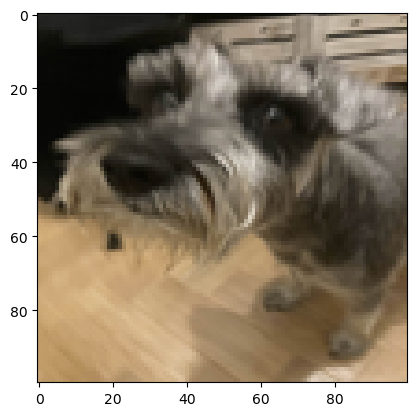

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Prediciton: This is a dog


In [112]:
# Get given image

# Get image 1 (to be made random in future) and resize to be 100x100x3
img = Image.open(r'Image Classification CNN Keras Dataset\images\test4.jpg')
img = img.resize([100,100],Image.LANCZOS)


# Display image
plt.imshow(img)
plt.show()

# Make a prediciotn
y_pred = model.predict(np.asarray(img).reshape(1, 100, 100, 3))

# I switched this because it was predicting backwards
if(y_pred < 0.5):
    pred = 'cat'
else:
    pred = 'dog'

print("Prediciton: This is a", pred)

